In [4]:
import pandas as pd
import re


In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
     

In [8]:
df=pd.read_csv(r"C:\Users\raghu\Desktop\New folder\toxictweets\nithindata.csv")

In [9]:
print(df.columns)
print(df.head())

Index(['Toxicity', 'tweet'], dtype='object')
   Toxicity                                              tweet
0         0   @user when a father is dysfunctional and is s...
1         0  @user @user thanks for #lyft credit i can't us...
2         0                                bihday your majesty
3         0  #model   i love u take with u all the time in ...
4         0             factsguide: society now    #motivation


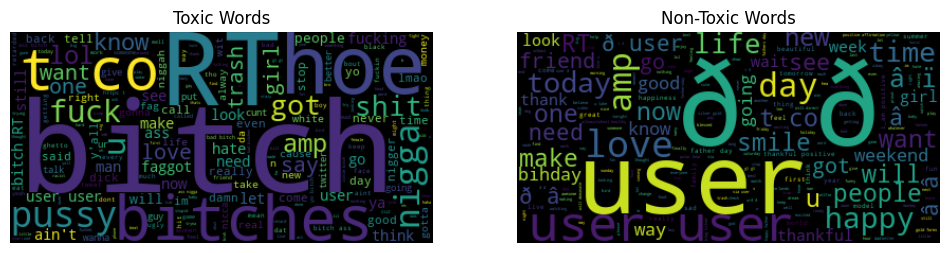

In [10]:
allToxicWords=' '.join(df[df['Toxicity']==1]['tweet'])
allNonToxicWords=' '.join(df[df['Toxicity']==0]['tweet'])
toxic_wordcloud = WordCloud().generate(allToxicWords)
non_toxic_wordcloud = WordCloud().generate(allNonToxicWords)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(toxic_wordcloud, interpolation='bilinear')
plt.title('Toxic Words')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(non_toxic_wordcloud, interpolation='bilinear')
plt.title('Non-Toxic Words')
plt.axis('off')

plt.show()

In [12]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\raghu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\raghu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [14]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\raghu\AppData\Roaming\nltk_data...


True

In [15]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
     

In [16]:
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back to form cleaned text
    cleaned_text = ' '.join(tokens)
    return cleaned_text


df['cleaned_tweet'] = df['tweet'].apply(clean_text)

In [17]:
df['cleaned_tweet']

0        user father dysfunctional selfish drag kid dys...
1        user user thanks lyft credit cant use cause do...
2                                           bihday majesty
3                              model love u take u time ur
4                            factsguide society motivation
                               ...                        
56740    yous muthafin lie lifeasking pearl coreyemanue...
56741    youve gone broke wrong heart baby drove rednec...
56742    young buck wan na eat dat nigguh like aint fuc...
56743                       youu got wild bitch tellin lie
56744    ruffled ntac eileen dahlia beautiful color com...
Name: cleaned_tweet, Length: 56745, dtype: object

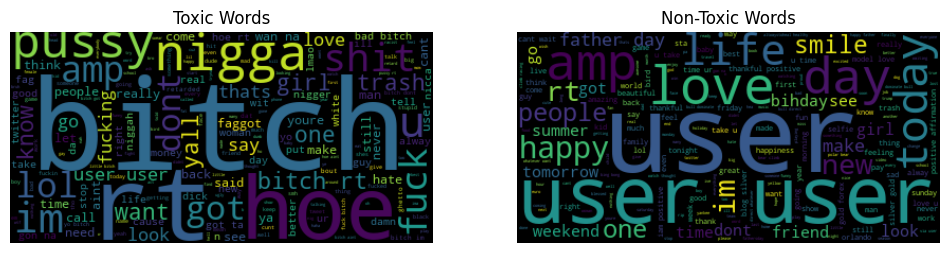

In [18]:
toxic_words = ' '.join(df[df['Toxicity'] == 1]['cleaned_tweet'])
non_toxic_words = ' '.join(df[df['Toxicity'] == 0]['cleaned_tweet'])

toxic_wordcloud = WordCloud().generate(toxic_words)
non_toxic_wordcloud = WordCloud().generate(non_toxic_words)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(toxic_wordcloud, interpolation='bilinear')
plt.title('Toxic Words')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(non_toxic_wordcloud, interpolation='bilinear')
plt.title('Non-Toxic Words')
plt.axis('off')

plt.show()

In [19]:
df.shape

(56745, 3)

In [20]:
X_train,X_test,y_train,y_test=train_test_split(df['cleaned_tweet'][:25000],df['Toxicity'][:25000],random_state=42,train_size=0.8)


In [21]:
X_train.shape

(20000,)

In [22]:
# Bag of Words
bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [23]:
def generate_metrics(y_true, y_pred_probs, model_name):
    y_pred = (y_pred_probs >= 0.5).astype(int)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred_probs)
    print(f"{model_name} Metrics:\nPrecision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}, ROC-AUC: {roc_auc:.2f}")
    return precision, recall, f1, roc_auc

# Train and predict for Bag of Words and TF-IDF
metrics_list = []
def model_specific_metrics(model_name,model):
    # Bag of Words
    model.fit(X_train_bow, y_train)
    predictions_bow = model.predict_proba(X_test_bow)[:, 1]
    precision_bow, recall_bow, f1_bow, roc_auc_bow = generate_metrics(y_test, predictions_bow, model_name + ' (Bag of Words)')
    metrics_list.append((model_name + ' (Bag of Words)', precision_bow, recall_bow, f1_bow, roc_auc_bow))

    # TF-IDF
    model.fit(X_train_tfidf, y_train)
    predictions_tfidf = model.predict_proba(X_test_tfidf)[:, 1]
    precision_tfidf, recall_tfidf, f1_tfidf, roc_auc_tfidf = generate_metrics(y_test, predictions_tfidf, model_name + ' (TF-IDF)')
    metrics_list.append((model_name + ' (TF-IDF)', precision_tfidf, recall_tfidf, f1_tfidf, roc_auc_tfidf))

In [24]:
dt=DecisionTreeClassifier()
model_specific_metrics('Decision Tree',dt)

Decision Tree (Bag of Words) Metrics:
Precision: 0.61, Recall: 0.57, F1-score: 0.59, ROC-AUC: 0.78
Decision Tree (TF-IDF) Metrics:
Precision: 0.56, Recall: 0.56, F1-score: 0.56, ROC-AUC: 0.77


In [25]:
rf=RandomForestClassifier()
model_specific_metrics('Random Forest',rf)

Random Forest (Bag of Words) Metrics:
Precision: 0.89, Recall: 0.47, F1-score: 0.62, ROC-AUC: 0.94
Random Forest (TF-IDF) Metrics:
Precision: 0.90, Recall: 0.50, F1-score: 0.64, ROC-AUC: 0.94


In [26]:
nb=MultinomialNB()
model_specific_metrics("Naive Bayes",nb)

Naive Bayes (Bag of Words) Metrics:
Precision: 0.83, Recall: 0.47, F1-score: 0.60, ROC-AUC: 0.93
Naive Bayes (TF-IDF) Metrics:
Precision: 1.00, Recall: 0.14, F1-score: 0.24, ROC-AUC: 0.91


In [27]:
knn=KNeighborsClassifier()
model_specific_metrics("KNeighborsClassifier",knn)

KNeighborsClassifier (Bag of Words) Metrics:
Precision: 0.95, Recall: 0.17, F1-score: 0.28, ROC-AUC: 0.73
KNeighborsClassifier (TF-IDF) Metrics:
Precision: 0.98, Recall: 0.17, F1-score: 0.29, ROC-AUC: 0.67


In [28]:
svm=SVC(probability=True)
model_specific_metrics("SVM",svm)

SVM (Bag of Words) Metrics:
Precision: 0.75, Recall: 0.58, F1-score: 0.65, ROC-AUC: 0.95
SVM (TF-IDF) Metrics:
Precision: 0.74, Recall: 0.62, F1-score: 0.68, ROC-AUC: 0.96


In [29]:
metrics_list

[('Decision Tree (Bag of Words)',
  0.6057692307692307,
  0.574468085106383,
  0.5897035881435257,
  0.7838665659351923),
 ('Decision Tree (TF-IDF)',
  0.5589123867069486,
  0.5623100303951368,
  0.5606060606060606,
  0.7651518553006685),
 ('Random Forest (Bag of Words)',
  0.8908045977011494,
  0.47112462006079026,
  0.6163021868787276,
  0.9385954466510363),
 ('Random Forest (TF-IDF)',
  0.9010989010989011,
  0.49848024316109424,
  0.6418786692759295,
  0.9424649538411682),
 ('Naive Bayes (Bag of Words)',
  0.8342245989304813,
  0.47416413373860183,
  0.6046511627906976,
  0.9261409889253942),
 ('Naive Bayes (TF-IDF)',
  1.0,
  0.13677811550151975,
  0.24064171122994651,
  0.9126525369299936),
 ('KNeighborsClassifier (Bag of Words)',
  0.9482758620689655,
  0.16717325227963525,
  0.2842377260981912,
  0.7268452633106428),
 ('KNeighborsClassifier (TF-IDF)',
  0.9821428571428571,
  0.16717325227963525,
  0.2857142857142857,
  0.6694299496537844),
 ('SVM (Bag of Words)',
  0.74509803921

In [30]:
metrics_df = pd.DataFrame(metrics_list, columns=['Model', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'])
metrics_df['Vectorization'] = ['Bag of Words' if 'Bag of Words' in model else 'TF-IDF' for model in metrics_df['Model']]

     

In [31]:
def generate_bar_chart(metrics_list, metric_name):
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Model', y=metric_name, hue='Vectorization', data=metrics_list)
    plt.xticks(rotation=45)
    plt.title(f'{metric_name} for Different Models')
    plt.xlabel('Model')
    plt.ylabel(metric_name)
    plt.tight_layout()
    plt.savefig(f'{metric_name.lower()}_bar_chart.pdf')
    plt.show()
    plt.close()

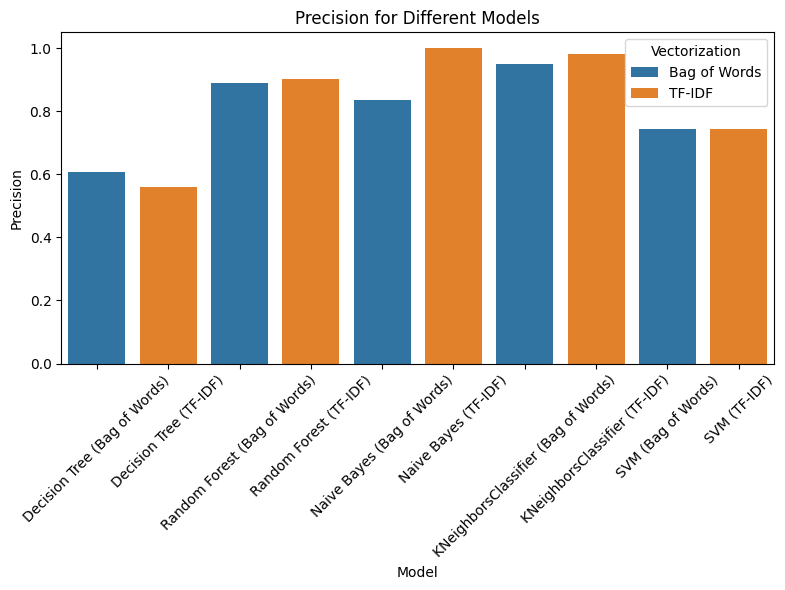

In [32]:
generate_bar_chart(metrics_df, 'Precision')

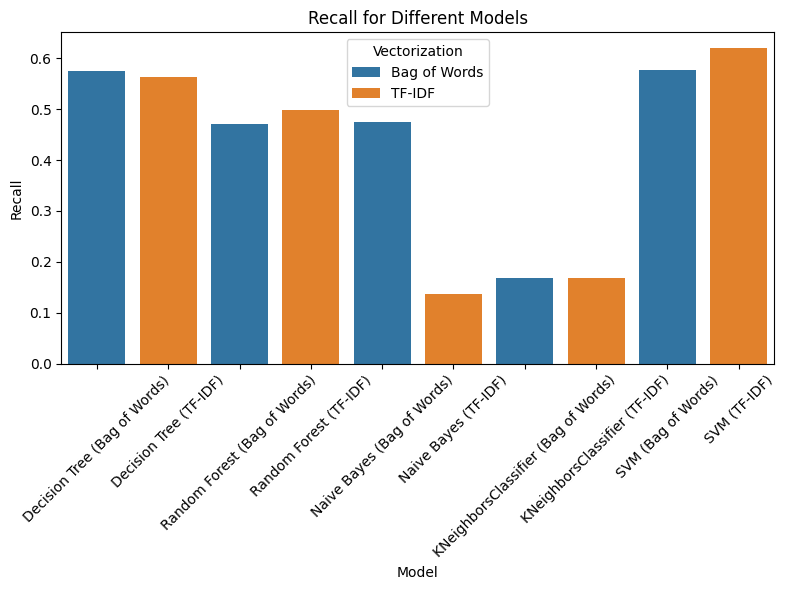

In [33]:
generate_bar_chart(metrics_df, 'Recall')

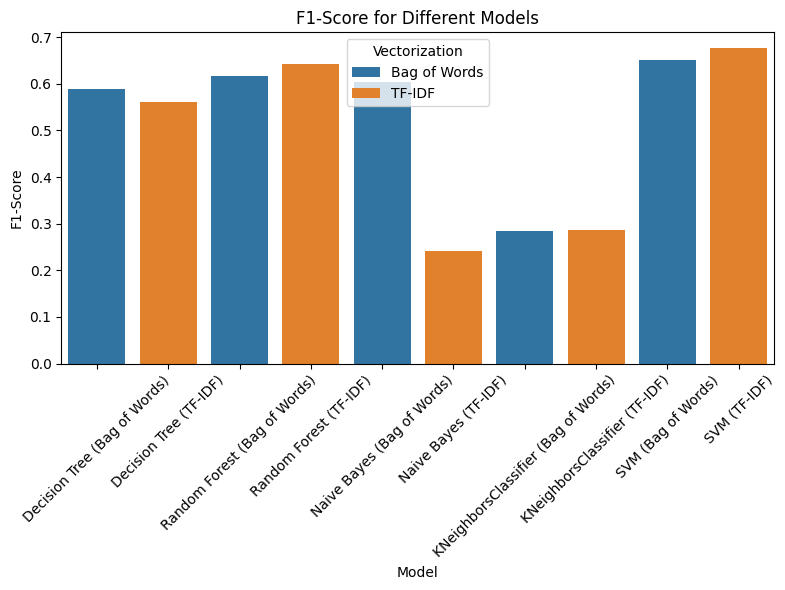

In [34]:
generate_bar_chart(metrics_df, 'F1-Score')

In [35]:
def generate_confusion_matrix_and_roc_curve(y_true, y_pred_probs, model_name):
    y_pred = (y_pred_probs >= 0.5).astype(int)
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.savefig(f'{model_name.lower()}_confusion_matrix.pdf')
    plt.show()
    plt.close()

    roc_auc = roc_auc_score(y_true, y_pred_probs)
    fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f'{model_name}, ROC-AUC: {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'{model_name.lower()}_roc_curve.pdf')
    plt.show()
    plt.close()

In [36]:
def plotRocAuc(model_name,model):
    # Bag of Words
    model.fit(X_train_bow, y_train)
    generate_confusion_matrix_and_roc_curve(y_test, model.predict_proba(X_test_bow)[:, 1], model_name + ' (Bag of Words)')

    # TF-IDF
    model.fit(X_train_tfidf, y_train)
    generate_confusion_matrix_and_roc_curve(y_test, model.predict_proba(X_test_tfidf)[:, 1], model_name + ' (TF-IDF)')
     

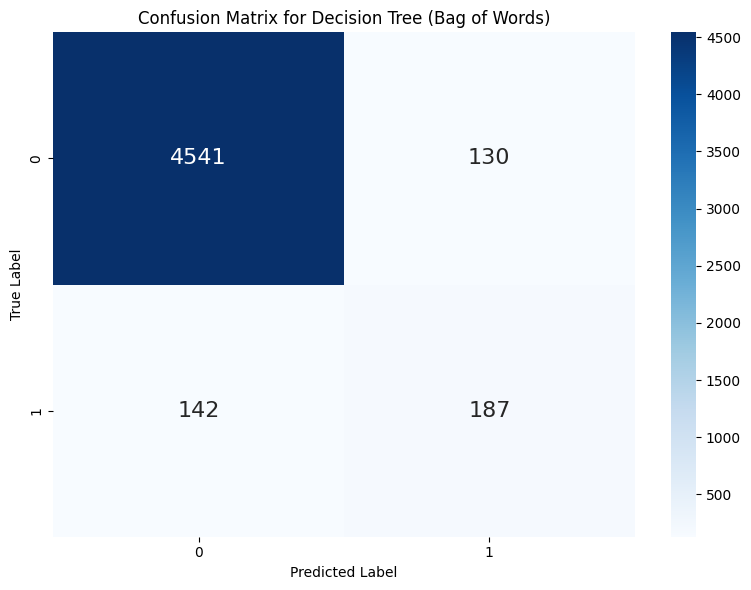

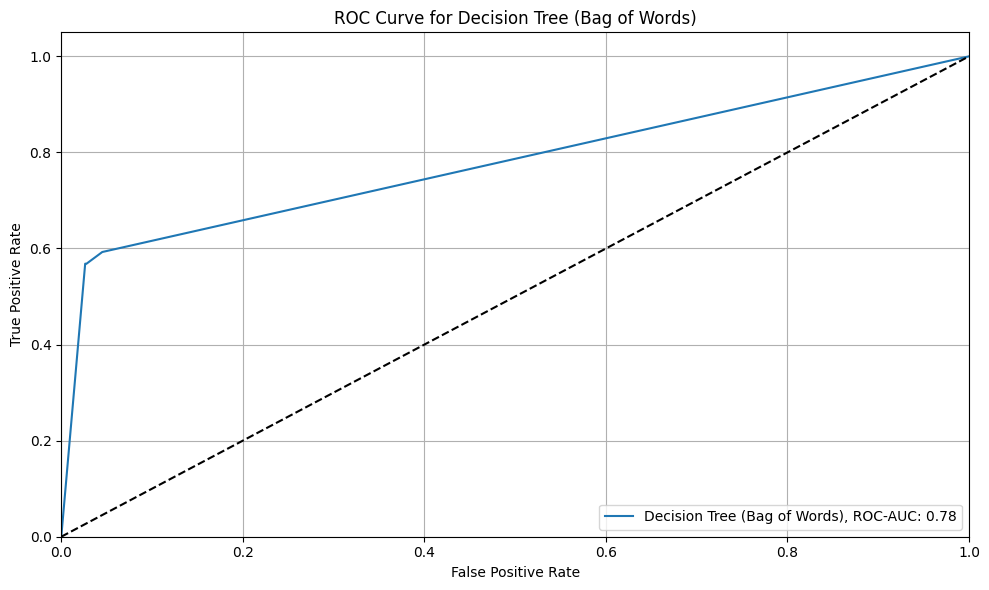

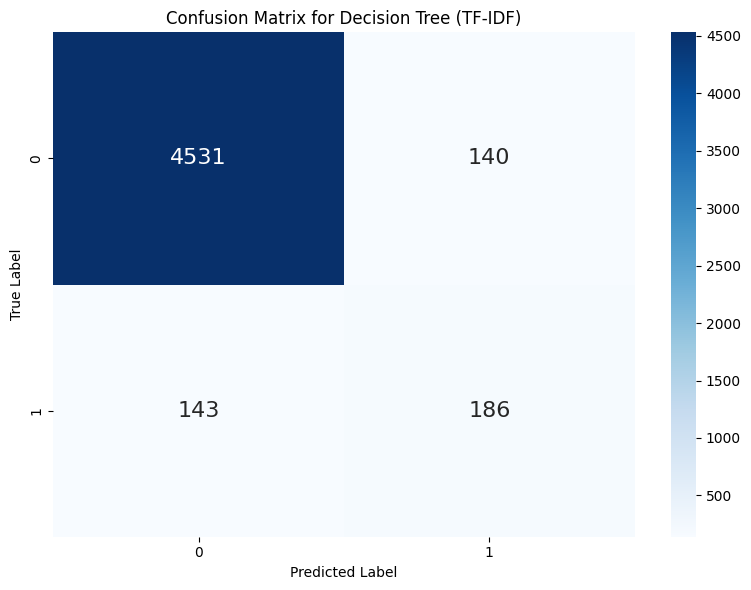

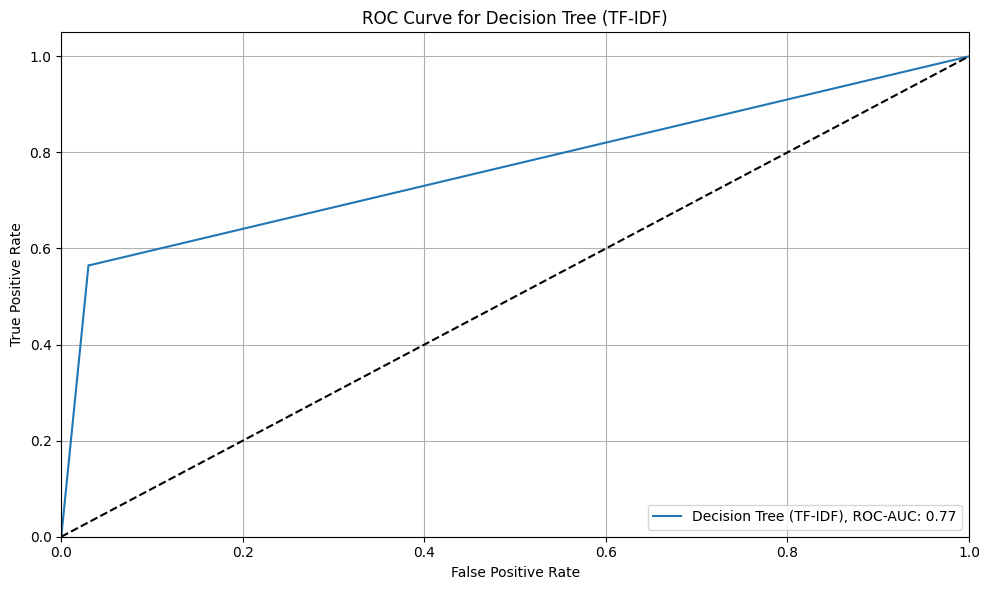

In [37]:
plotRocAuc("Decision Tree",dt)

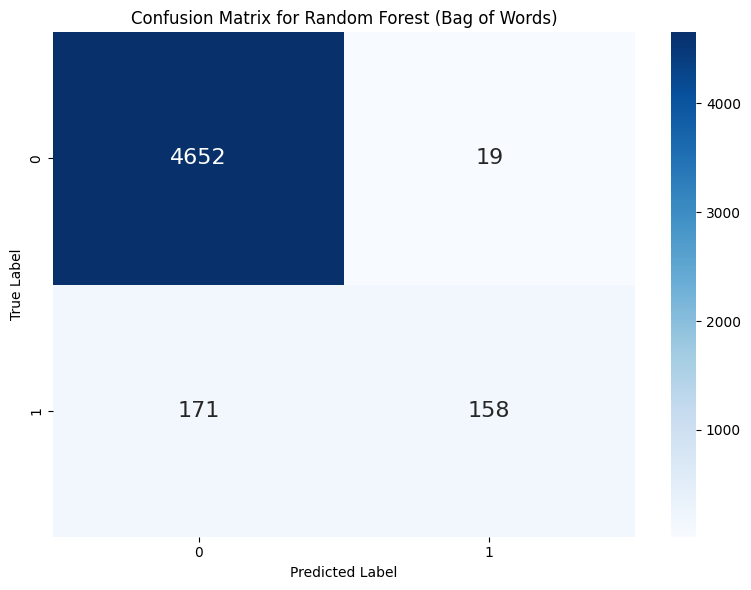

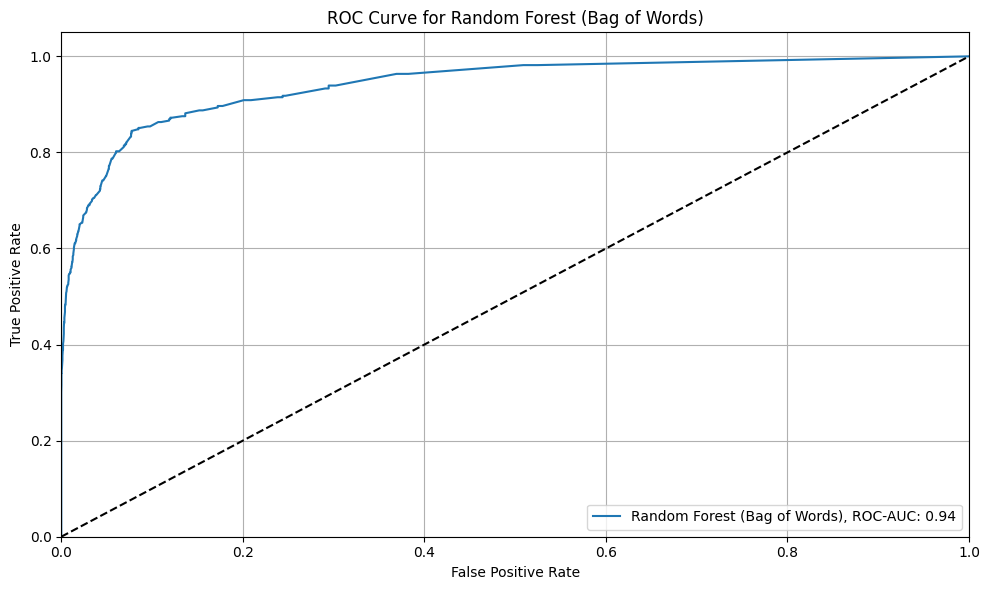

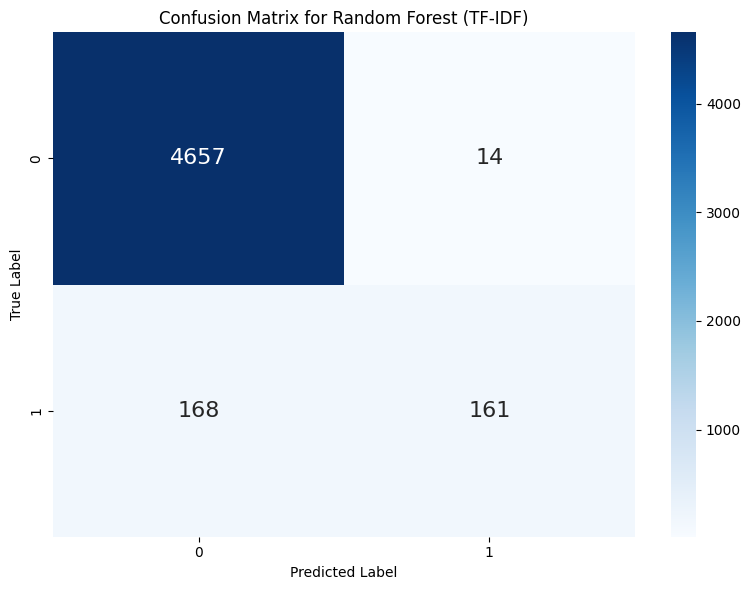

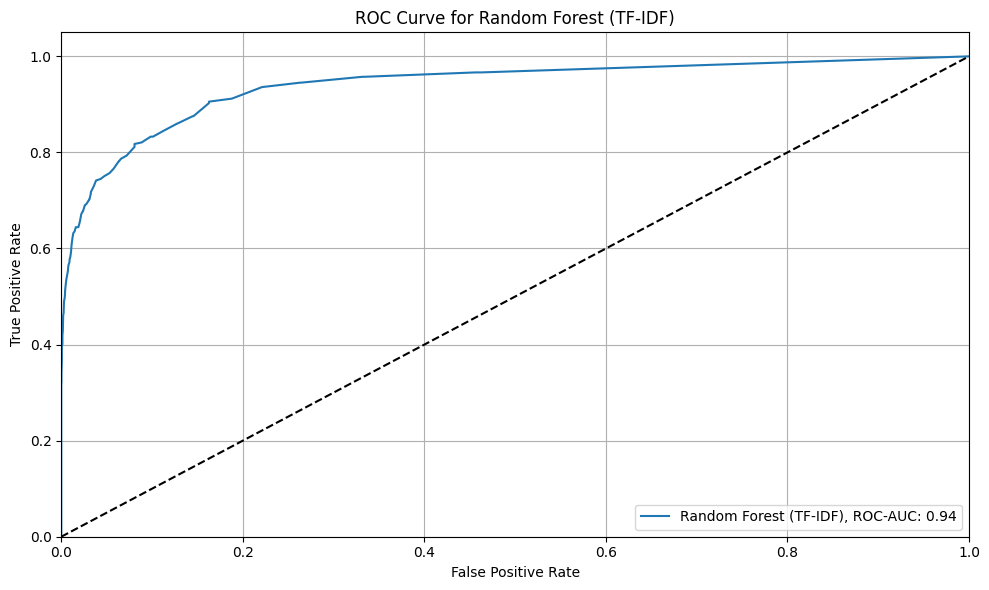

In [38]:
plotRocAuc("Random Forest",rf)

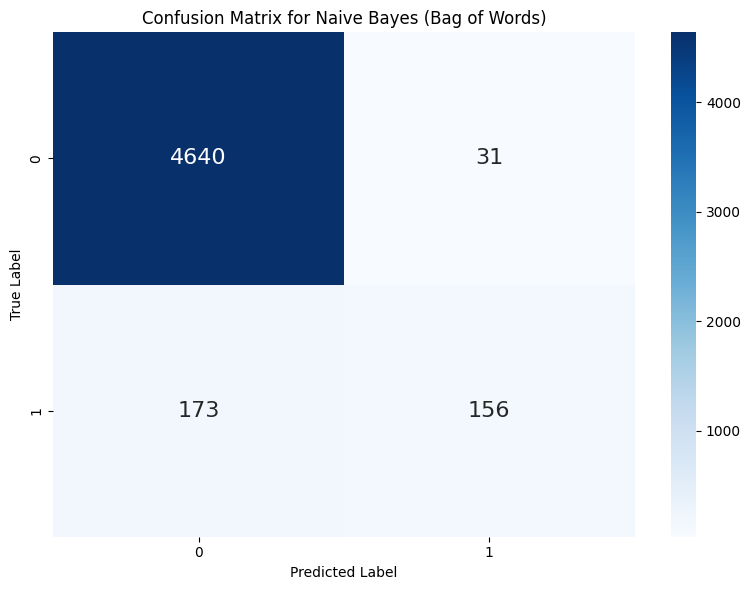

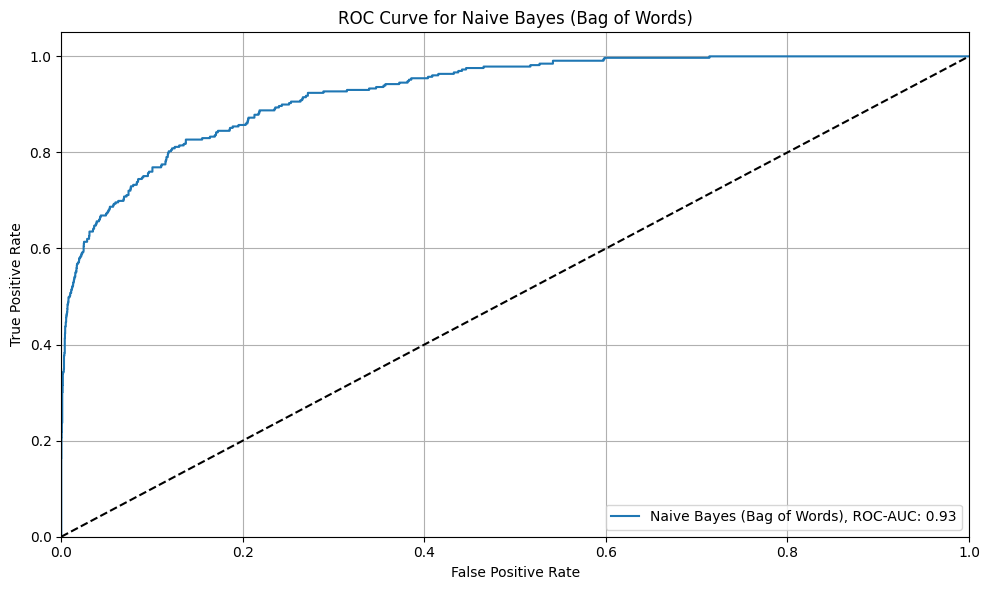

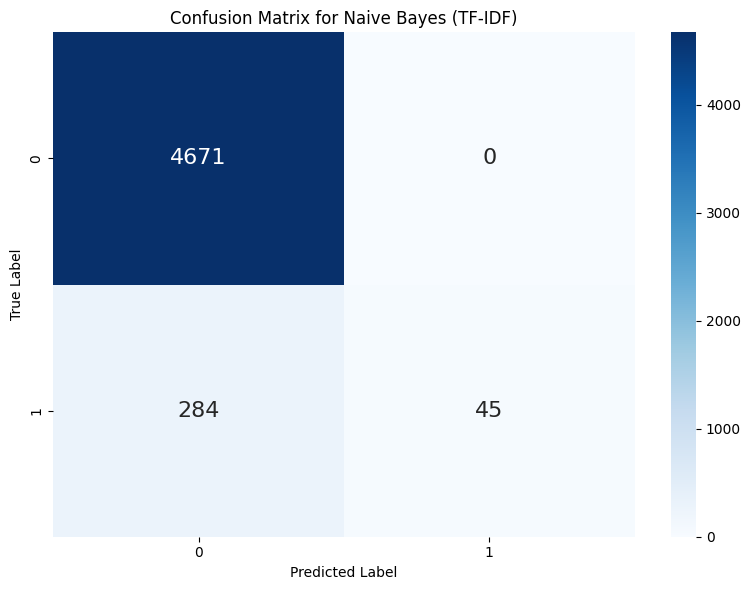

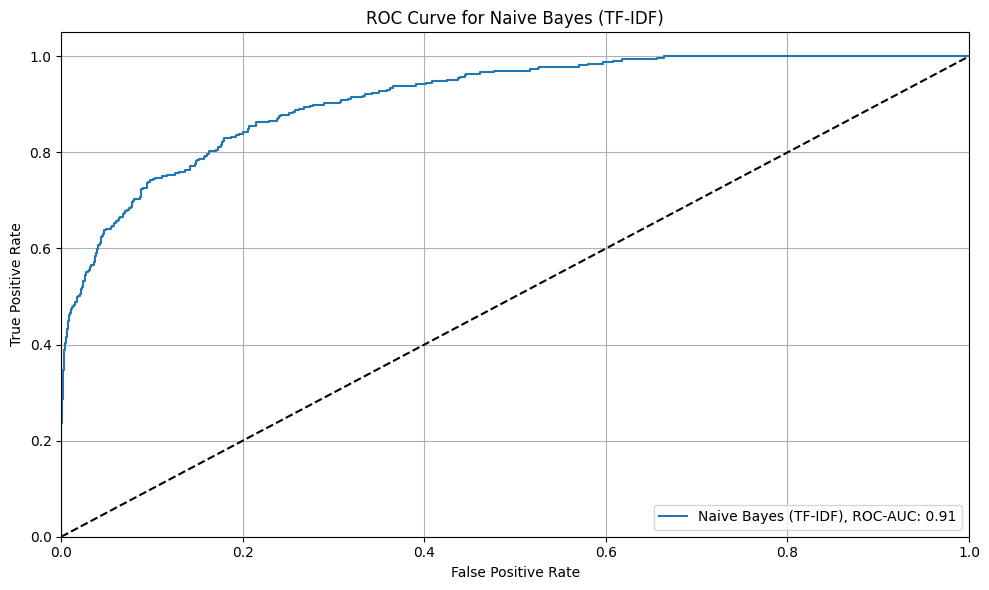

In [39]:
plotRocAuc("Naive Bayes",nb)

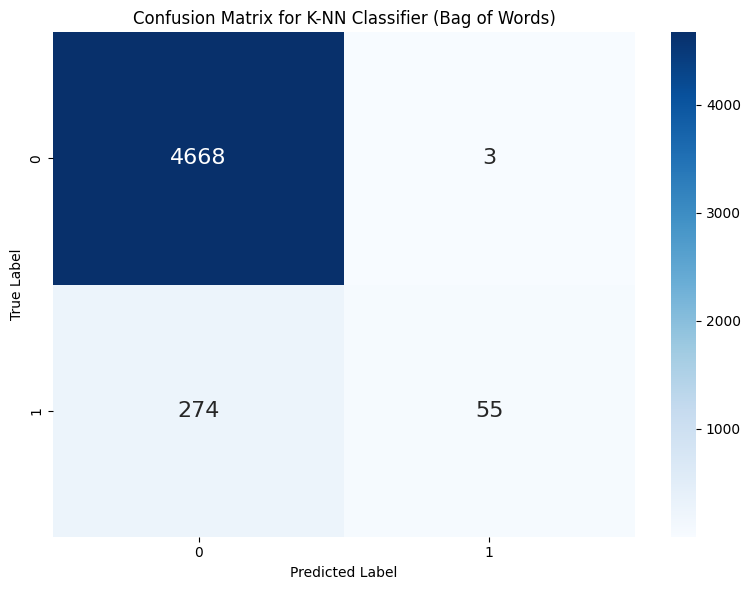

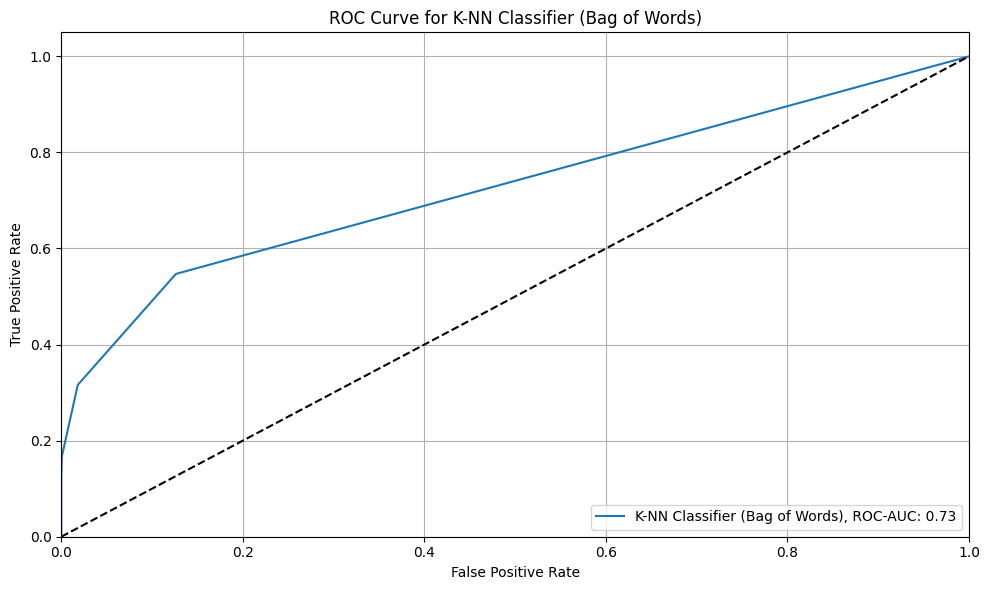

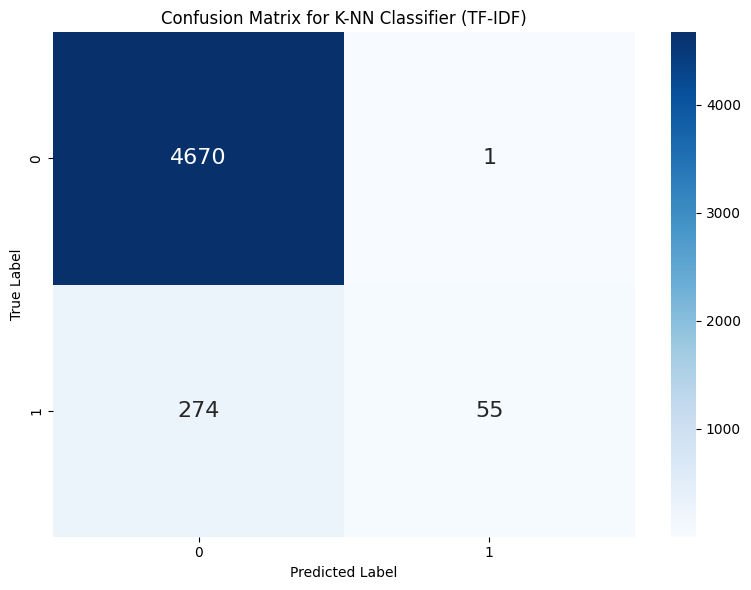

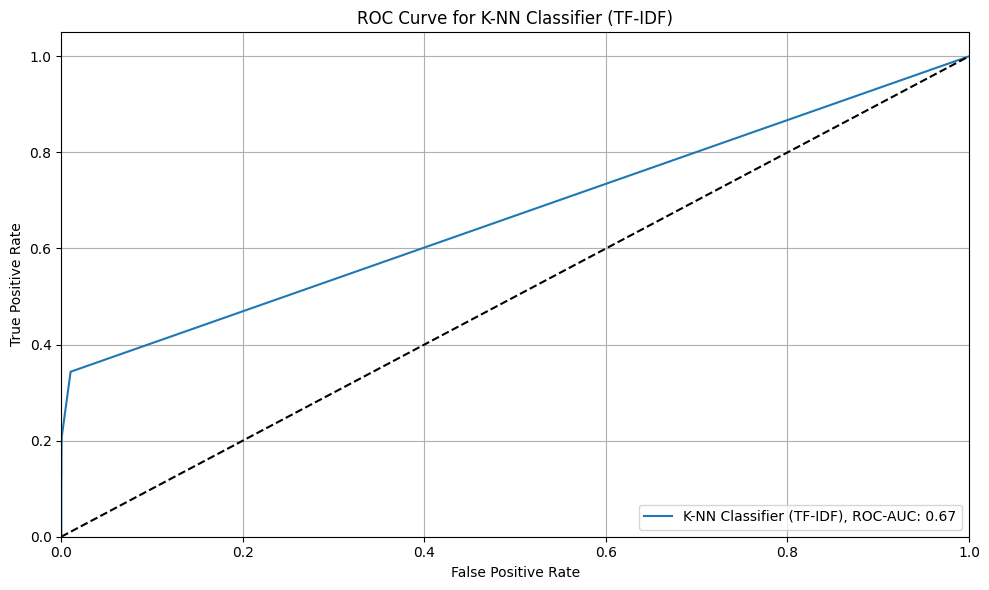

In [40]:
plotRocAuc("K-NN Classifier",knn)


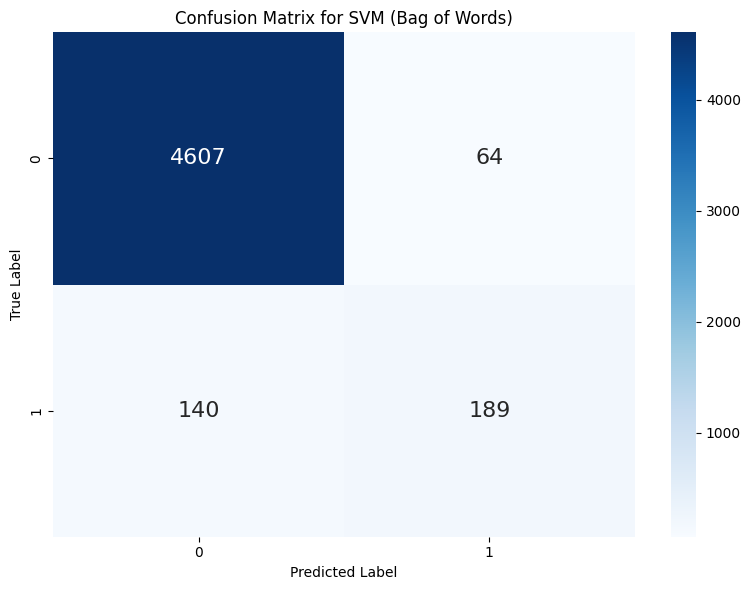

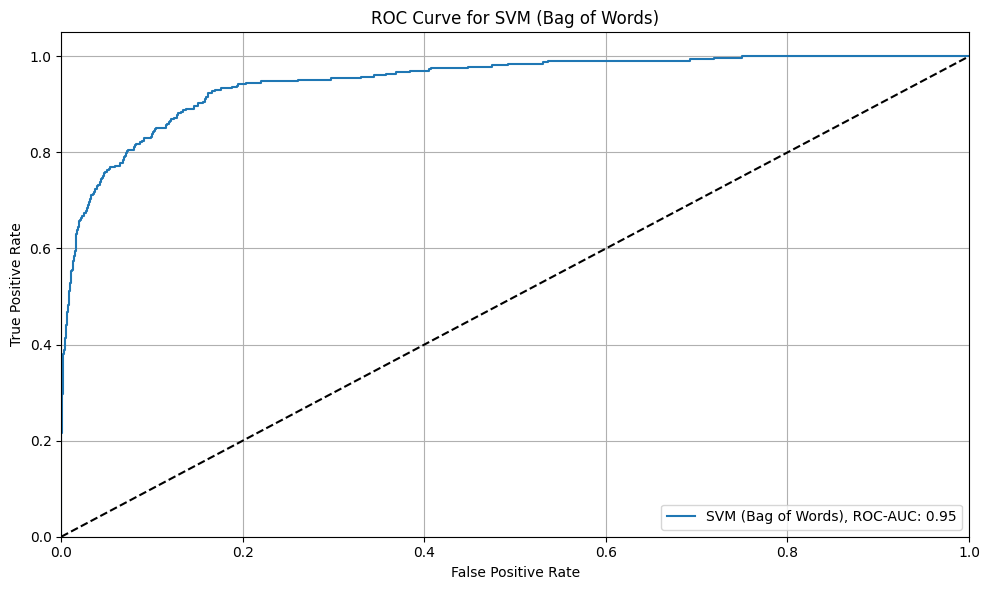

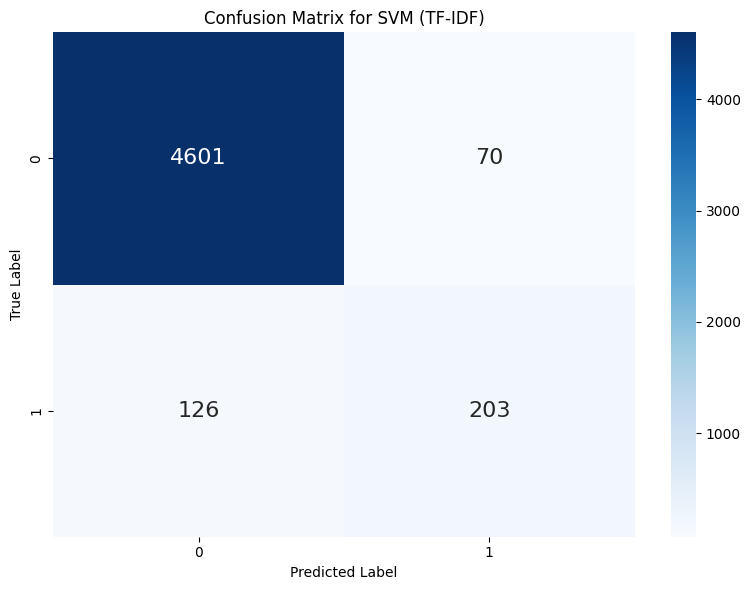

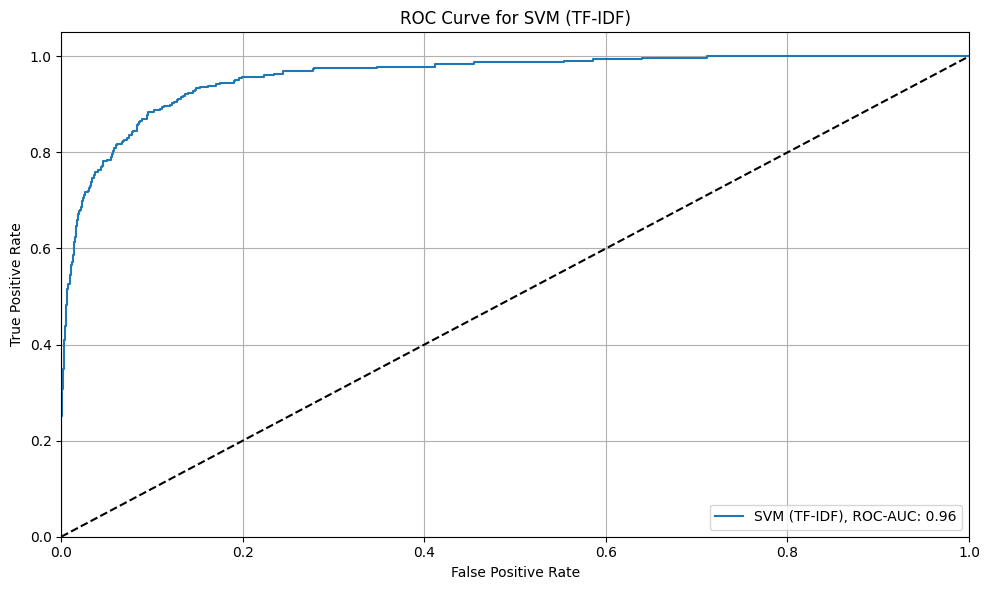

In [41]:
svm=SVC(probability=True)
plotRocAuc("SVM",svm)
     